In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [31]:
train_dir = 'training_data'
val_dir = 'val_data'

train_files = glob.glob(train_dir + '/*.csv')
val_files = glob.glob(val_dir + '/*.csv')

In [38]:
train_dfs = {}
val_dfs = {}

for file in train_files:
    df = pd.read_csv(file)

    # Get the name of the file
    name = os.path.basename(file)

    df['Epoch_val'] = df['Step'] / 238
    df['Epoch'] = df['Epoch_val'].apply(np.floor).astype(int)

    df = df.drop(columns=['Wall time','Step', 'Epoch_val'])

    epoch_averages = df.groupby('Epoch')['Value'].mean().reset_index()

    epoch_averages = epoch_averages.set_index('Epoch')

    train_dfs[name] = epoch_averages

for file in val_files:
    df = pd.read_csv(file)

    # Get the name of the file
    name = os.path.basename(file)

    df.rename(columns={'Step': 'Epoch'}, inplace=True)

    df = df.drop(columns=['Wall time'])

    df = df.set_index('Epoch')

    val_dfs[name] = df


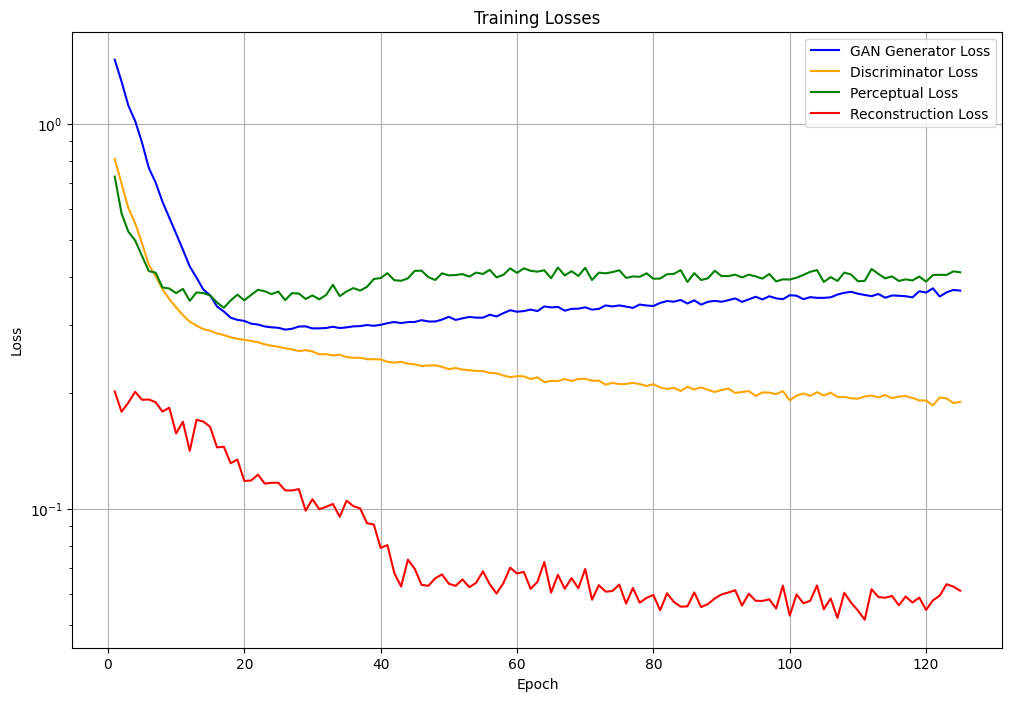

In [63]:
plt.figure(figsize=(12, 8))
plt.title('Training Losses')
plt.plot(train_dfs['Loss_G_GAN.csv'], label='GAN Generator Loss', linestyle='-', color='blue')
plt.plot(train_dfs['Loss_D.csv'], label='Discriminator Loss', linestyle='-', color='orange')
plt.plot(train_dfs['Loss_Perceptual.csv'], label='Perceptual Loss', linestyle='-', color='green')
plt.plot(train_dfs['Loss_Reconstruction.csv'], label='Reconstruction Loss', linestyle='-', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'size'

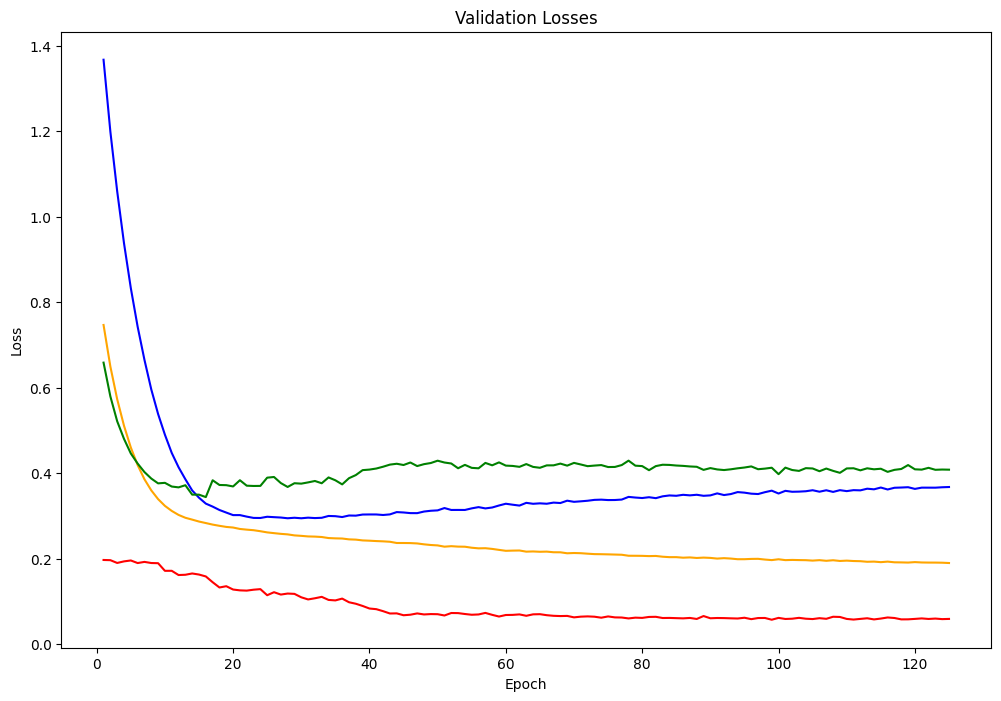

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Validation Losses')
plt.plot(val_dfs['Val_Loss_G_GAN.csv'], label='GAN Generator Loss', linestyle='-', color='blue')
plt.plot(val_dfs['Val_Loss_D.csv'], label='Discriminator Loss', linestyle='-', color='orange')
plt.plot(val_dfs['Val_Loss_Perceptual.csv'], label='Perceptual Loss', linestyle='-', color='green')
plt.plot(val_dfs['Val_Loss_Reconstruction.csv'], label='Reconstruction Loss', linestyle='-', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

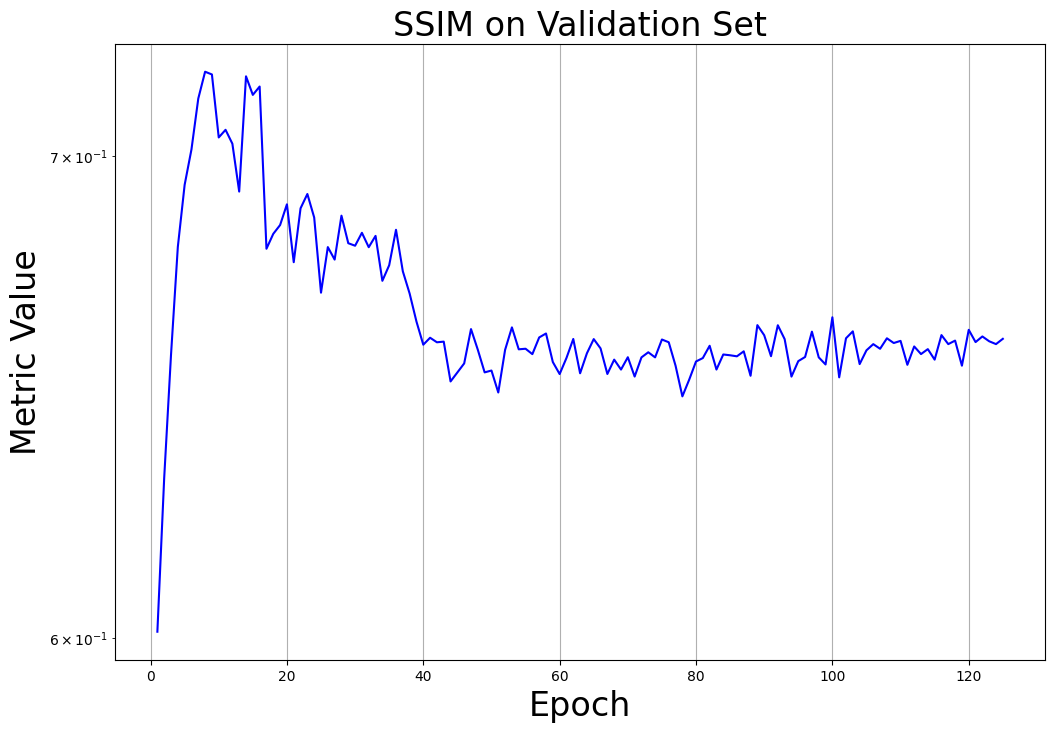

In [70]:
plt.figure(figsize=(12, 8))
plt.title('SSIM on Validation Set', fontsize=24)
plt.plot(val_dfs['Val_SSIM.csv'], label='SSIM', linestyle='-', color='blue')
# plt.plot(val_dfs['Val_FID.csv'], label='Discriminator Loss', linestyle='-', color='orange')

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Metric Value', fontsize=24)
plt.grid()
plt.yscale('log')
plt.show()

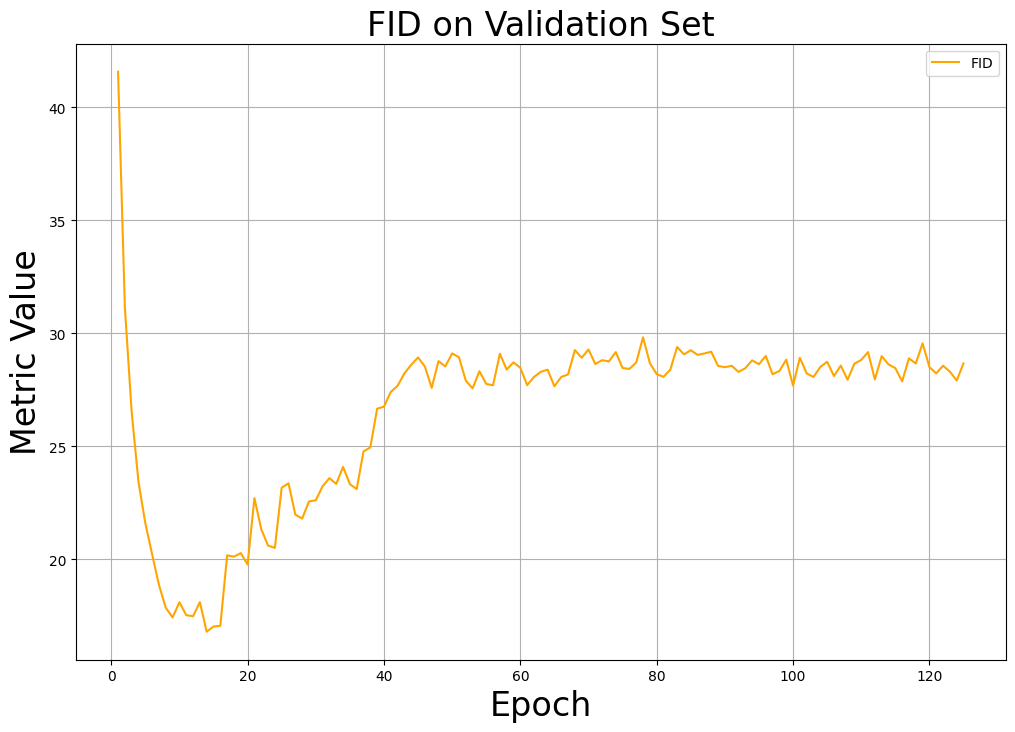

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('FID on Validation Set', fontsize=24)
# plt.plot(val_dfs['Val_SSIM.csv'], label='SSIM', linestyle='-', color='blue')
plt.plot(val_dfs['Val_FID.csv'], label='FID', linestyle='-', color='orange')

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Metric Value', fontsize=24)
plt.grid()
plt.show()

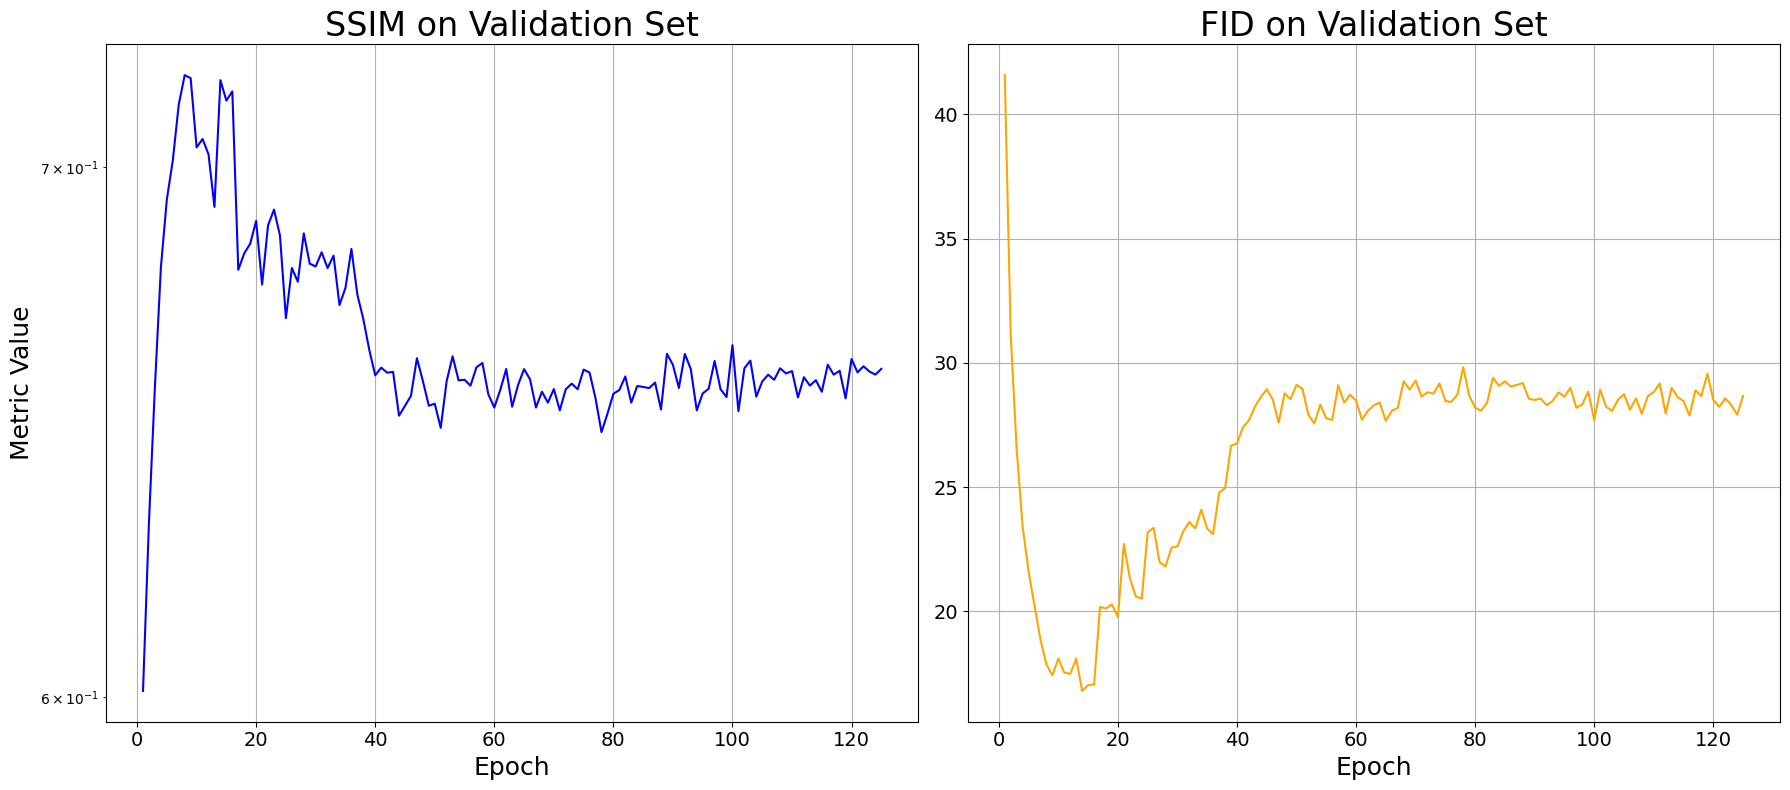

In [ ]:

# Plot for SSIM on the first subplot

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 2 rows, 1 column
axes[0].set_title('SSIM on Validation Set', fontsize=24)
axes[0].plot(val_dfs['Val_SSIM.csv'], label='SSIM', linestyle='-', color='blue')
axes[0].set_xlabel('Epoch', fontsize=18)
axes[0].set_ylabel('Metric Value', fontsize=18)
axes[0].grid()
axes[0].set_yscale('log')
axes[0].tick_params(axis='both', which='major', labelsize=20)  # Increase tick label size

# Plot for FID on the second subplot
axes[1].set_title('FID on Validation Set', fontsize=24)
axes[1].plot(val_dfs['Val_FID.csv'], label='FID', linestyle='-', color='orange')
axes[1].set_xlabel('Epoch', fontsize=18)
axes[1].grid()
axes[1].tick_params(axis='both', which='major', labelsize=20)  # Increase tick label size

plt.tight_layout()  # Adjust spacing between subplots
plt.show()